 #                         FACE MASK DETECTION SYSTEM


# Importing libraries

In [2]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D
from keras.layers import SpatialDropout2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.models import load_model
from keras.models import Sequential
from keras.preprocessing import image
import cv2
import datetime
import smtplib


# CNN ARCHITECTURE

In [3]:
mymodel=Sequential()
mymodel.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
mymodel.add(MaxPooling2D() )
mymodel.add(Conv2D(32,(3,3),activation='relu'))
mymodel.add(MaxPooling2D() )
mymodel.add(Conv2D(32,(3,3),activation='relu'))
mymodel.add(MaxPooling2D() )
mymodel.add(Flatten())
mymodel.add(Dense(100,activation='relu'))
mymodel.add(Dense(1,activation='sigmoid'))


In [4]:
mymodel.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

# Compile the model

In [5]:
mymodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Training the Model

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagenerator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagenerator = ImageDataGenerator(rescale=1./255)

training_set = train_datagenerator.flow_from_directory(
        'train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

testing_set = test_datagenerator.flow_from_directory(
        'test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

save_mymodel=mymodel.fit_generator(
        training_set,
        epochs=10,
        validation_data=testing_set,

        )


Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
83/83 [==============================] - 24s 294ms/step - loss: 0.2332 - accuracy: 0.9026 - val_loss: 0.1766 - val_accuracy: 0.9536
Epoch 2/10
83/83 [==============================] - 32s 387ms/step - loss: 0.1481 - accuracy: 0.9467 - val_loss: 0.1216 - val_accuracy: 0.9588
Epoch 3/10
83/83 [==============================] - 36s 428ms/step - loss: 0.1095 - accuracy: 0.9604 - val_loss: 0.0720 - val_accuracy: 0.9691
Epoch 4/10
83/83 [==============================] - 32s 382ms/step - loss: 0.0832 - accuracy: 0.9688 - val_loss: 0.0980 - val_accuracy: 0.9639
Epoch 5/10
83/83 [==============================] - 24s 285ms/step - loss: 0.0695 - accuracy: 0.9787 - val_loss: 0.0594 - val_accuracy: 0.9794
Epoch 6/10
83/83 [==============================] - 25s 298ms/step - loss: 0.0769 - accuracy: 0.9772 - val_loss: 0.1066 - val_

# Saving the model

In [15]:
mymodel.save('mymodel4.h5',save_mymodel)

# Making Predictions for Individual images

In [16]:
from tensorflow.keras.models  import load_model
mymodel = load_model('mymodel4.h5')

# Checking prediction for unmasked image

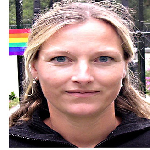

In [17]:

testing_image=image.load_img(r'C:\Users\91932\PycharmProjects\DIV_D_HW/31.jpg',
                          target_size=(150,150,3))
testing_image

In [18]:
testing_image=image.img_to_array(testing_image)

In [19]:
testing_image

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 88.,  78.,  76.],
        [ 79.,  71.,  69.],
        [ 71.,  67.,  64.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 85.,  79.,  65.],
        [ 76.,  72.,  61.],
        [ 64.,  64.,  54.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 91.,  83.,  72.],
        [ 80.,  73.,  67.],
        [ 69.,  65.,  62.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 54.,  53.,  59.],
        [ 51.,  50.,  58.],
        [ 52.,  51.,  59.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [250., 252., 251.],
        [254., 255., 255.],
        [253., 253., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [20]:
testing_image=image.img_to_array(testing_image)
testing_image=np.expand_dims(testing_image,axis=0)
prediction=mymodel.predict_classes(testing_image)[0][0]

if prediction==0:
    print('with Mask')
else:
    print('no mask')

no mask


# Checking prediction for masked image

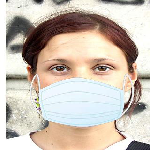

In [21]:

test_image=image.load_img(r'C:\Users\91932\PycharmProjects\DIV_D_HW/37.jpg',
                          target_size=(150,150,3))
test_image

In [22]:
testing_image=image.img_to_array(test_image)
testing_image

array([[[255., 255., 253.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [209., 209., 199.],
        [218., 218., 210.],
        [181., 177., 174.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [229., 228., 223.],
        [206., 205., 203.],
        [180., 176., 177.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [231., 230., 228.],
        [204., 202., 203.],
        [180., 175., 181.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 49.,  49.,  59.],
        [ 46.,  46.,  56.],
        [ 63.,  63.,  73.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 27.,  27.,  37.],
        [ 66.,  66.,  76.],
        [ 34.,  34.,  44.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [23]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
prediction=mymodel.predict_classes(test_image)[0][0]

if prediction==0:
    print('with Mask')
else:
    print('no mask')

with Mask


# Using OpenCV for Real Time Application

In [30]:
Capture_video=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [31]:
SUBJECT = "Subject"
TEXT = "One Visitor has been detected without mask. See in camera to recognise user"

while Capture_video.isOpened():
    _,img=Capture_video.read()
    gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_image = face_cascade.detectMultiScale(gray_scale, 1.3, 5)
#     face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    for(x,y,w,h) in face_image:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('Datasets/temp.jpg',face_img)
        test_image=image.load_img(r'Datasets/temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        prediction=mymodel.predict_classes(test_image)[0][0]
        if prediction==0:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),3)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'NO MASK',(int((x+w)//2),y+h+20),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),1)
            message = 'Subject : {}\n\n{}'.format(SUBJECT,TEXT)
            mail_to_authority = smtplib.SMTP('smtp.gmail.com',587)
            mail_to_authority.ehlo()
            mail_to_authority.starttls()
            mail_to_authority.login('tejasdharmikcp2@gmail.com','capstone')
            mail_to_authority.sendmail('tejasdharmikcp2@gmail.com','tejasdharmikcp2@gmail.com',message)
            mail_to_authority.close

        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_COMPLEX,0.5,(255,255,255),1)
        
          
    cv2.imshow('Face mask Detection',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
    
Capture_video.release()
cv2.destroyAllWindows()

# Plot Graph for training loss and accuracy

In [32]:
import matplotlib.pyplot as plt

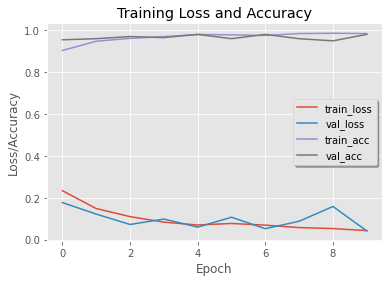

In [33]:
epochs=10
Num = epochs
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, Num), save_mymodel.history["loss"], label="train_loss")
plt.plot(np.arange(0, Num), save_mymodel.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, Num), save_mymodel.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, Num), save_mymodel.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best",shadow=True)
plt.savefig("plot1.png")

plt.show()